In [ ]:
## Introduction

In [ ]:
# The data choosen for this project is from Kaggle.com and titlled "HR Analytics: Job Change of Data Scientists." 
# The purpose of this data is to be able to predict if someone is more m

In [ ]:
# Data Features

# The features of the the data are as follows
# enrollee_id : Unique ID for candidate, 
# city: City code
# city_ development _index : Developement index of the city (scaled), 
# gender: Gender of candidate
# relevent_experience: Relevant experience of candidate
# enrolled_university: Type of University course enrolled if any
# education_level: Education level of candidate
# major_discipline :Education major discipline of candidate
# experience: Candidate total experience in years
# company_size: No of employees in current employer's company
# company_type : Type of current employer
# lastnewjob: Difference in years between previous job and current job
# training_hours: training hours completed
# target: 0 – Not looking for job change, 1 – Looking for a job change

In [ ]:
## Prepare and Wrangle data with Pandas and Numpy

In [1]:
import pandas as pd
import numpy as np


In [2]:
# load the target data for the test set, provided as a numpy array

target =  np.load('/Users/anaortez-rivera/DS-201-Project-1/jobchange_test_target_values.npy')

In [3]:
len(target)

2129

In [4]:
# load the test set, provided as a CSV file

testdata = pd.read_csv('/Users/anaortez-rivera/DS-201-Project-1/aug_test.csv',sep=',')

In [5]:
len(testdata)


2129

In [6]:
testdata[0:5]  # test data without the target column


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [7]:
target[:5]   #   target array

array([1., 0., 1., 0., 1.])

In [8]:
testdata['target'] = target    #   add the column with targets to testdata 

In [9]:
testdata[:5]  #  test data with the target column

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21,1.0
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98,0.0
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15,1.0
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39,0.0
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72,1.0


In [10]:
# load the training set, provided as a CSV file

training = pd.read_csv('/Users/anaortez-rivera/DS-201-Project-1/aug_train.csv',sep=',')

In [11]:
len(training)

19158

In [12]:
training[:5]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [13]:
# save the test set with target column included

testdata.to_csv ('/Users/anaortez-rivera/DS-201-Project-1/aug_test1.csv', sep = ',')

In [14]:
# Checking to see how many null values
training.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [15]:
# Dropping all the nulls 
new_training = training.dropna()

In [16]:
# viewing new dataset
print(new_training)

       enrollee_id      city  city_development_index  gender  \
1            29725   city_40                   0.776    Male   
4              666  city_162                   0.767    Male   
7              402   city_46                   0.762    Male   
8            27107  city_103                   0.920    Male   
11           23853  city_103                   0.920    Male   
...            ...       ...                     ...     ...   
19147        21319   city_21                   0.624    Male   
19149          251  city_103                   0.920    Male   
19150        32313  city_160                   0.920  Female   
19152        29754  city_103                   0.920  Female   
19155        24576  city_103                   0.920    Male   

           relevent_experience enrolled_university education_level  \
1       No relevent experience       no_enrollment        Graduate   
4      Has relevent experience       no_enrollment         Masters   
7      Has relevent e

In [17]:
# checking that there are no more nulls
new_training.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [18]:
# Viewing head of new data
new_training.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0


In [19]:
## Use EDA principles and the Matplotlib / Seaborn packages to visualize the data

In [31]:
# Importing packages
import seaborn as sns
import matplotlib.pyplot as plt

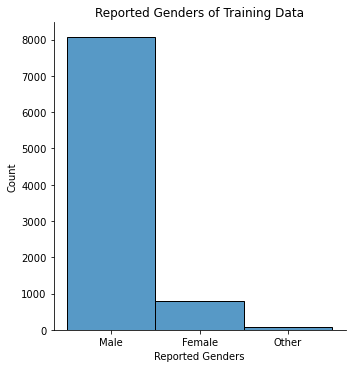

In [21]:
# Creating histogram of genders in training data
sns.displot(new_training['gender'])
plt.xlabel('Reported Genders')
plt.ylabel('Count')
plt.title('Reported Genders of Training Data')
plt.show()

/Users/anaortez-rivera/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


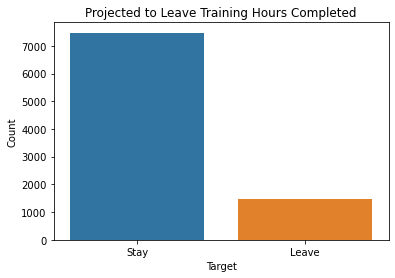

In [56]:
# Creating bargraph of the number of people who are projected to leave or stay in training data 
sns.countplot('target', data = new_training)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Projected to Leave Training Hours Completed')
plt.xticks([0.0, 1.0], ['Stay', 'Leave'])
plt.show()

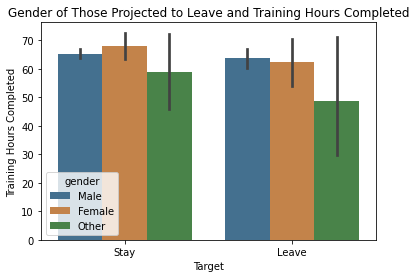

In [57]:
# Creating barplot of the genders of people who are projected to leave and the training hours completed
sns.barplot(x="target", y="training_hours", hue="gender", data=new_training, saturation=.5)
plt.xticks([0.0, 1.0], ['Stay', 'Leave'])
plt.xlabel('Target')
plt.ylabel('Training Hours Completed')
plt.title('Gender of Those Projected to Leave and Training Hours Completed')
plt.show()